In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,mean_absolute_error
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

In [64]:
df = pd.read_csv("D:\\study\\dai101\\tips (data for regression problem).csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.shape

(244, 7)

In [33]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
df.isnull().sum()# no null value found

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [8]:
df.duplicated()#no duplicated value found

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool

In [9]:
#converting categorical to numerical
df = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
df.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


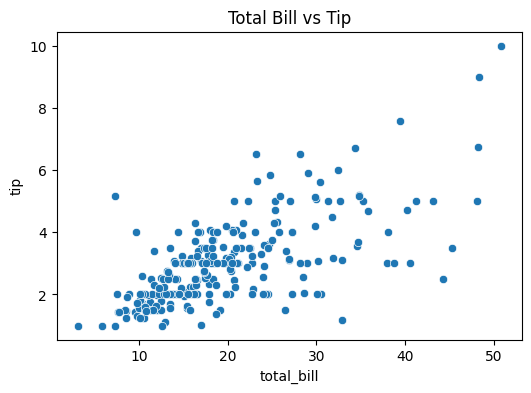

In [10]:
#scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title("Total Bill vs Tip")
plt.show()

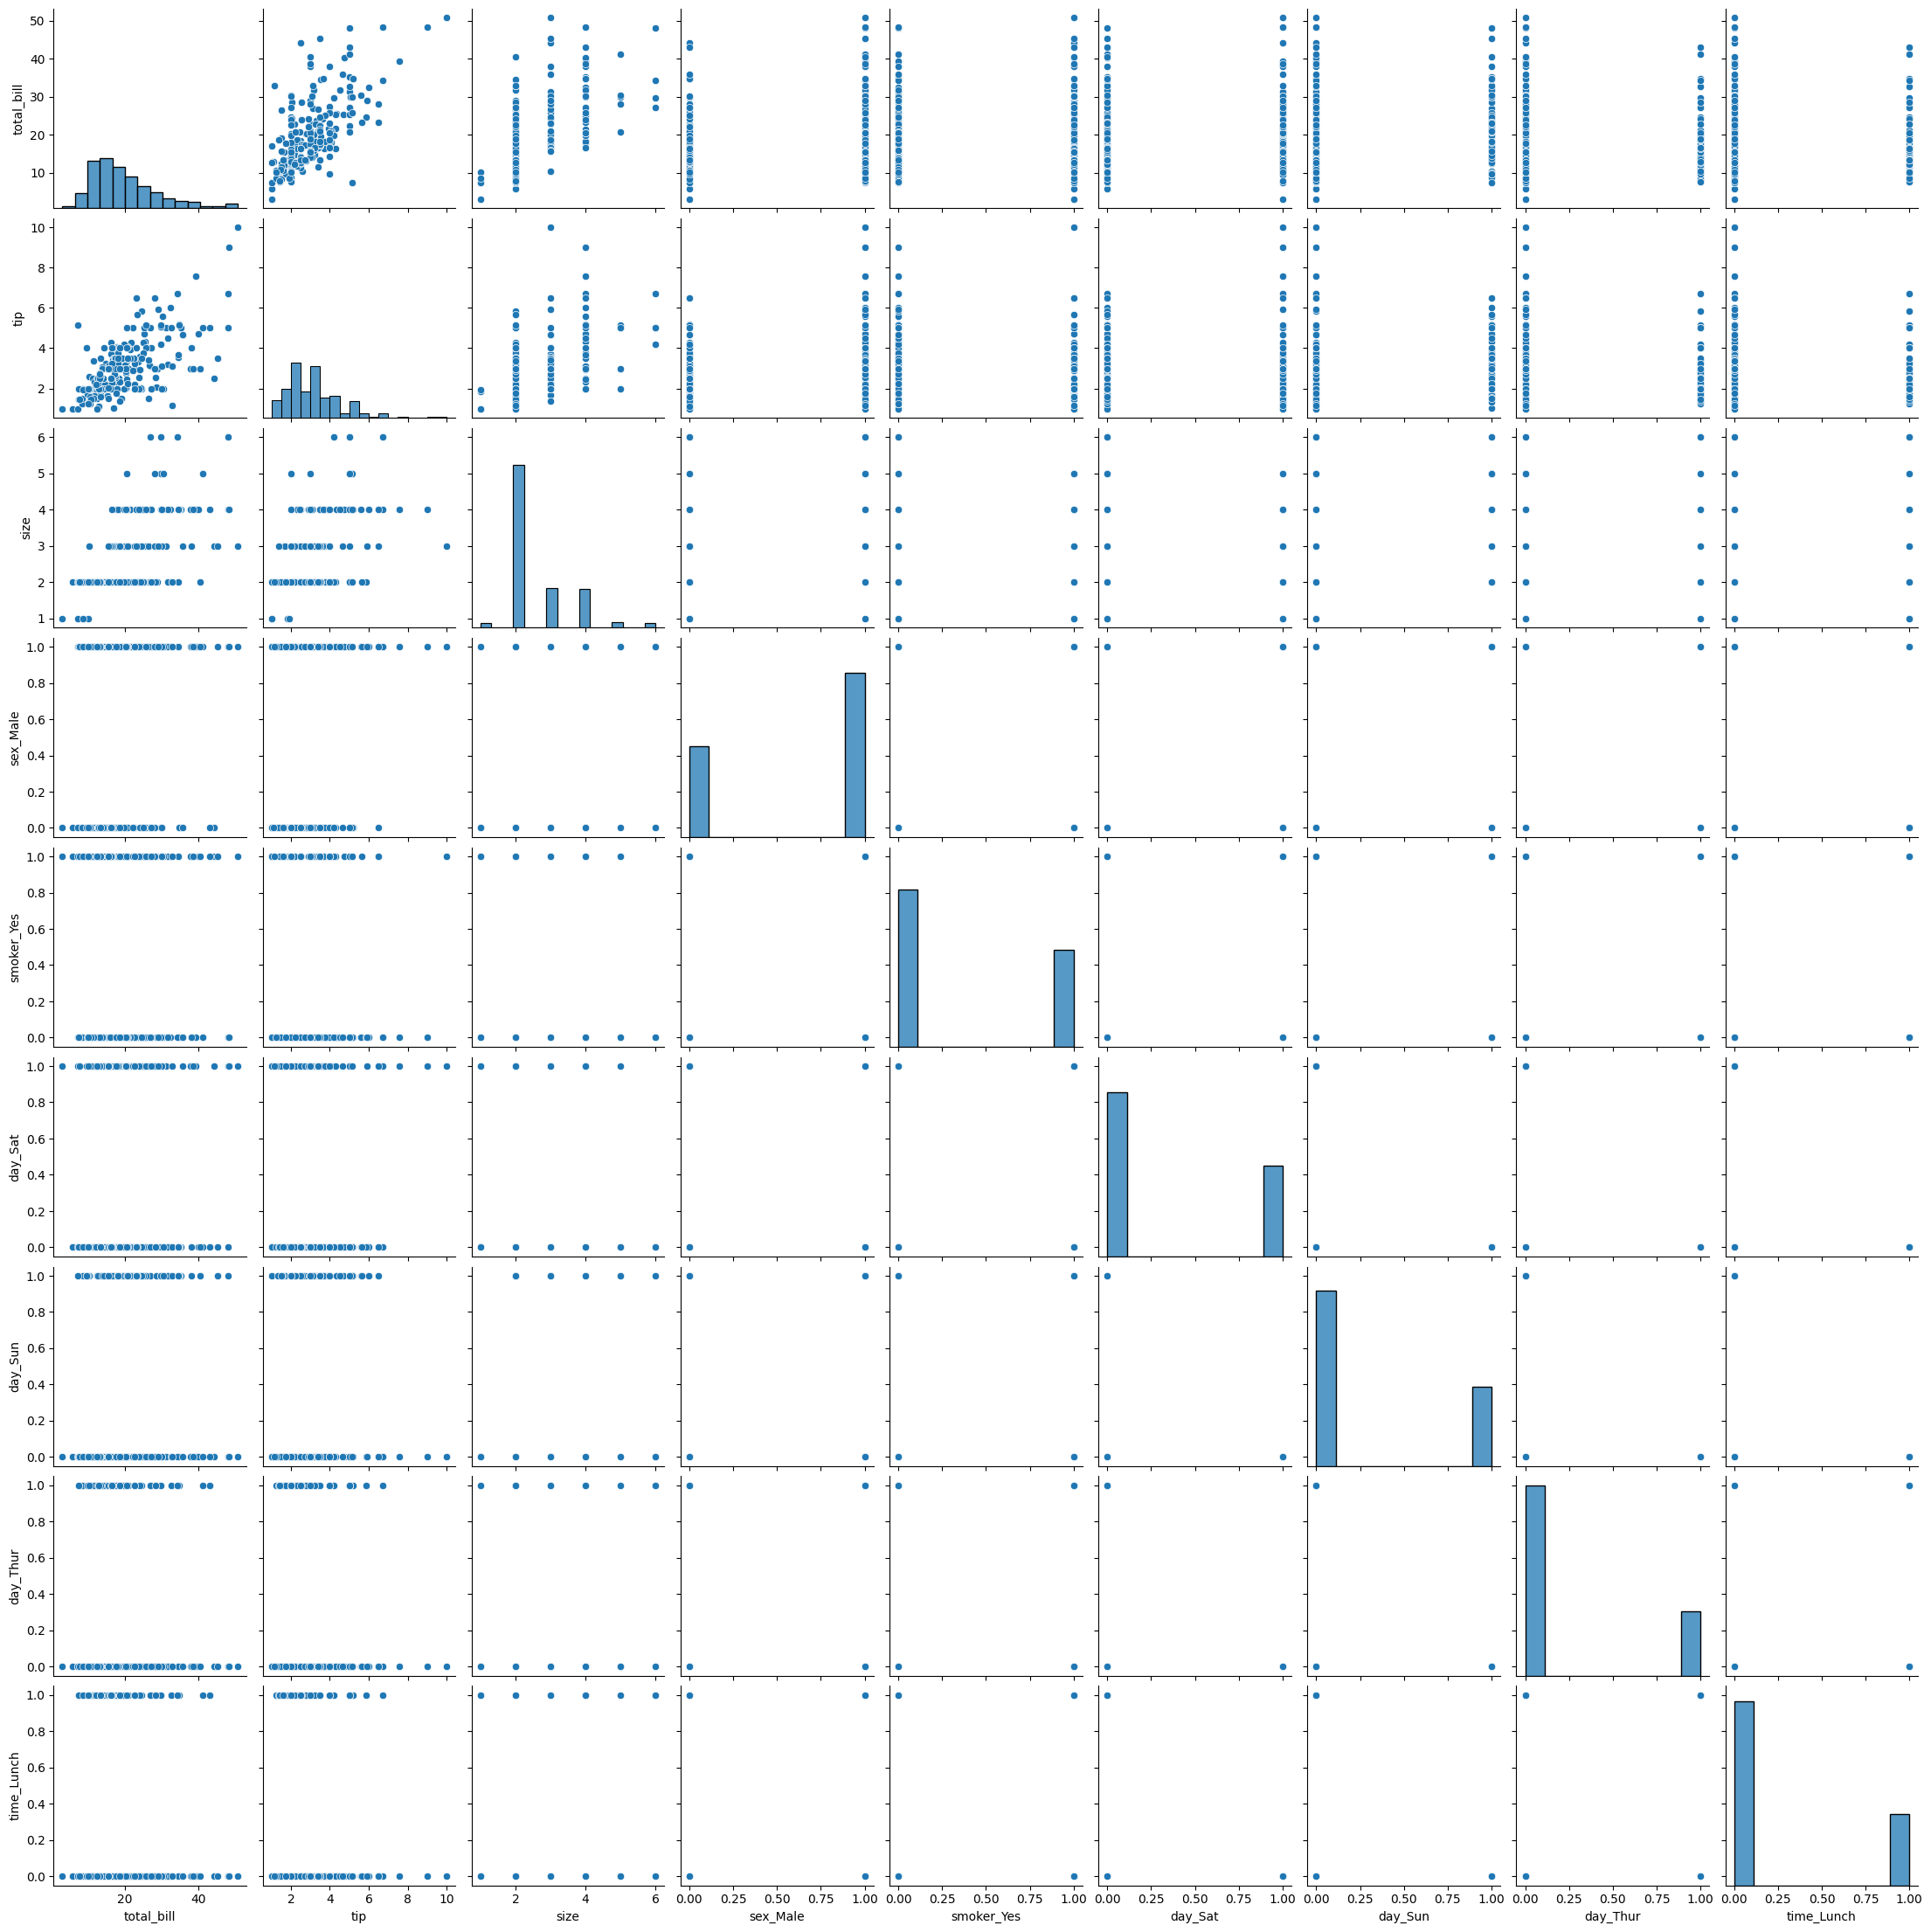

In [12]:
#pairplot
sns.pairplot(df)
plt.show()

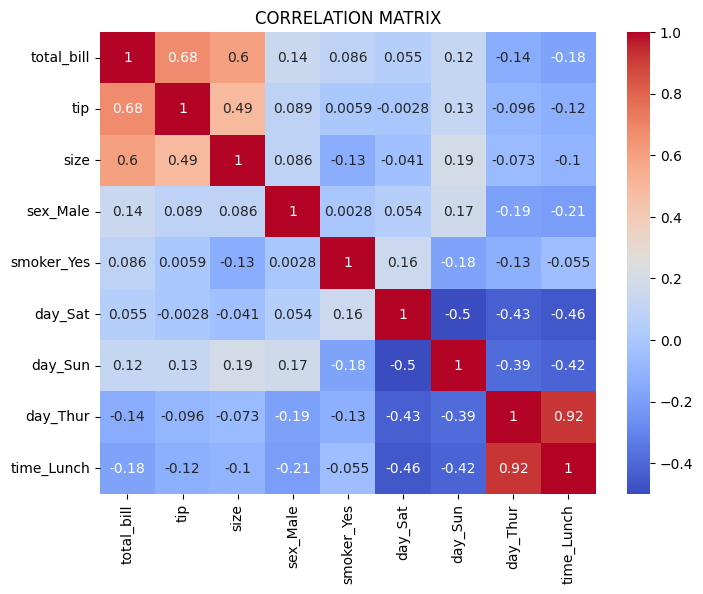

In [16]:
#correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("CORRELATION MATRIX")
plt.show()

Rainbow Test Statistic: 1.2291480226129028
Rainbow Test p-value: 0.12911921525513964


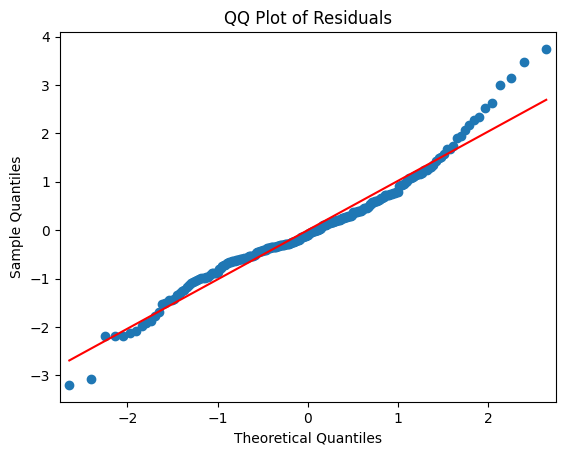

Fail to reject the null hypothesis - the model is linear.


In [22]:
# Doing rainbow Test for Linearity
X = sm.add_constant(df['total_bill']) 
y = df['tip']

# Fitting an OLS regression model
model = sm.OLS(y, X).fit()

rainbow_stat, rainbow_p_value = sm.stats.linear_rainbow(model)
print(f"Rainbow Test Statistic: {rainbow_stat}")
print(f"Rainbow Test p-value: {rainbow_p_value}")

qqplot(model.resid, line='s')
plt.title("QQ Plot of Residuals")
plt.show()

# Interpretation
if rainbow_p_value > 0.05:
    print("Fail to reject the null hypothesis - the model is linear.")
else:
    print("Reject the null hypothesis - the model is not linear.")

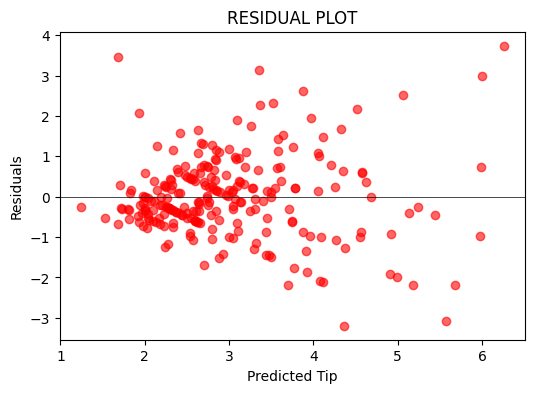

In [24]:
# Doing residual plot 
X = df[['total_bill']]
y = df['tip']
model = LinearRegression().fit(X, y)
predictions = model.predict(X)
residuals = y - predictions

plt.figure(figsize=(6, 4))
plt.scatter(predictions, residuals, color="r", alpha=0.6)
plt.axhline(0, color='black', linewidth=0.5)
plt.title("RESIDUAL PLOT")
plt.xlabel("Predicted Tip")
plt.ylabel("Residuals")
plt.show()

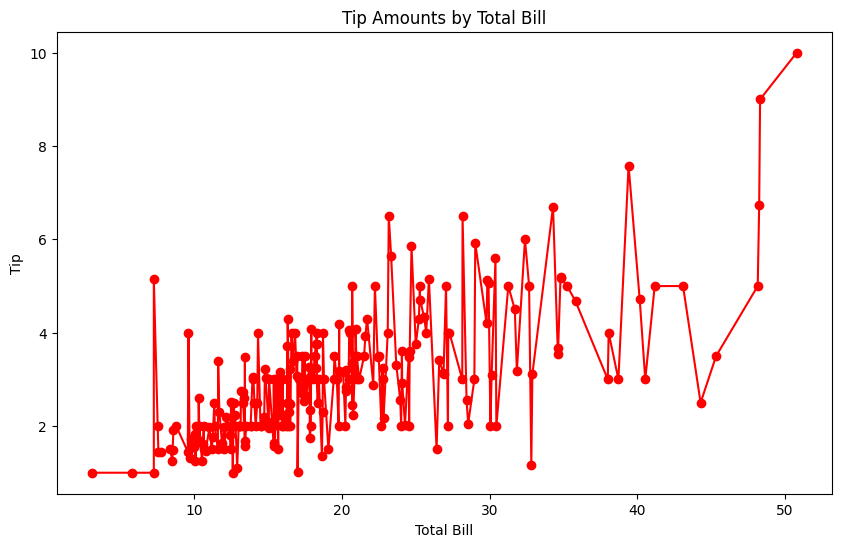

In [26]:
# Sorting data by total bill for line plot 
sorted_data = df.sort_values(by='total_bill')
plt.figure(figsize=(10, 6))
plt.plot(sorted_data['total_bill'], sorted_data['tip'], marker='o', linestyle='-',color = "r")
plt.title("Tip Amounts by Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

In [52]:
# Splitting the data into training and testing sets
X = df.drop("tip", axis=1)
y = df["tip"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {
    "Model": [],
    "R2 Score": [],
    "Accuracy Score": []
}

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_test.round(), y_pred.round())
    results["Model"].append(name)
    results["R2 Score"].append(r2)
    results["Accuracy Score"].append(accuracy)


# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model("Linear Regression", lr, X_test, y_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
evaluate_model("Ridge Regression", ridge, X_test, y_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
evaluate_model("Lasso Regression", lasso, X_test, y_test)

# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
evaluate_model("Decision Tree Regression", dt, X_test, y_test)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
evaluate_model("Random Forest Regression", rf, X_test, y_test)

# Support Vector Regression
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train, y_train)
evaluate_model("Support Vector Regression", svr, X_test, y_test)

# K-Nearest Neighbors Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
evaluate_model("K-Nearest Neighbors Regression", knn, X_test, y_test)

results_df = pd.DataFrame(results)
print(results_df)

                            Model  R2 Score  Accuracy Score
0               Linear Regression  0.437302        0.408163
1                Ridge Regression  0.439389        0.408163
2                Lasso Regression  0.527307        0.408163
3        Decision Tree Regression -0.004178        0.428571
4        Random Forest Regression  0.264246        0.387755
5       Support Vector Regression  0.032005        0.326531
6  K-Nearest Neighbors Regression  0.298886        0.387755


After checking all models, we can conclude that Lasso regression is best suite for this model.Decision Tree and SVM performs worst in this case.

In [51]:
# Analyzing significant factors impacting tips using Lasso Regression 
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
feature_importance = pd.Series(lasso.coef_, index=X_train.columns)
feature_importance = feature_importance[feature_importance != 0] #excluding features with zero coefficients
feature_importance = feature_importance.sort_values(key=abs, ascending=False)
print("Feature Importance in Lasso Regression:")
print(feature_importance)

Feature Importance in Lasso Regression:
size          0.108081
total_bill    0.099099
dtype: float64


In [57]:
# Splitting the data into training and testing sets
X = df[["total_bill"]]
y = df["tip"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {
    "Model": [],
    "R2 Score": [],
    "Accuracy Score": []
}

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_test.round(), y_pred.round())
    results["Model"].append(name)
    results["R2 Score"].append(r2)
    results["Accuracy Score"].append(accuracy)
    print(f"{name} - R2 Score: {r2}, Accuracy Score: {accuracy}")

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model("Linear Regression", lr, X_test, y_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
evaluate_model("Ridge Regression", ridge, X_test, y_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
evaluate_model("Lasso Regression", lasso, X_test, y_test)

# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
evaluate_model("Decision Tree Regression", dt, X_test, y_test)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
evaluate_model("Random Forest Regression", rf, X_test, y_test)

# Support Vector Regression
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train, y_train)
evaluate_model("Support Vector Regression", svr, X_test, y_test)

# K-Nearest Neighbors Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
evaluate_model("K-Nearest Neighbors Regression", knn, X_test, y_test)

results_df = pd.DataFrame(results)
print(results_df)

Linear Regression - R2 Score: 0.5449381659234663, Accuracy Score: 0.42857142857142855
Ridge Regression - R2 Score: 0.5449458342338539, Accuracy Score: 0.42857142857142855
Lasso Regression - R2 Score: 0.5462147597181777, Accuracy Score: 0.4489795918367347
Decision Tree Regression - R2 Score: -0.06898287247700985, Accuracy Score: 0.30612244897959184
Random Forest Regression - R2 Score: 0.19370766751511703, Accuracy Score: 0.40816326530612246
Support Vector Regression - R2 Score: 0.1135145943220236, Accuracy Score: 0.3877551020408163
K-Nearest Neighbors Regression - R2 Score: 0.4545453410143979, Accuracy Score: 0.3673469387755102
                            Model  R2 Score  Accuracy Score
0               Linear Regression  0.544938        0.428571
1                Ridge Regression  0.544946        0.428571
2                Lasso Regression  0.546215        0.448980
3        Decision Tree Regression -0.068983        0.306122
4        Random Forest Regression  0.193708        0.408163
5    

THIS IS THE MODEL WHICH IS PROVIDING MAXIMUM ACCURACY SCORE AND BEST SUITE FOR DATA SET

Conclusion : Elements Affecting Tip Amounts: 

Multiple experiments were performed to enhance the R-squared and accuracy rates. At first, every column aside from "tips" was used as features (input variables), resulting in a highest R-squared of 52% and an accuracy of 40%. Subsequently, only the "size" and "total_bill" columns were utilized as features, reaching comparable maximum R-squared and accuracy scores of 52.7% and 40.8%, respectively. Ultimately, when solely the "total_bill" column was designated as the input variable, the peak R-squared and accuracy scores were noted, at 54.6% and 44.8%, respectively. Of all the models evaluated, Lasso Regression yielded the most favorable results, suggesting that "total_bill" is the key determinant of tip amounts. 

Forecast Precision: 

Lasso Regression yielded the highest R-squared value at 54.6% and reliably attained the top accuracy score, establishing it as the most efficient model for estimating tip amounts. Ridge and Linear Regression models also showed strong performance, achieving R-squared values of 54.4% and 54.5%, respectively. Conversely, models such as Decision Tree, Random Forest, SVR, and KNN exhibited markedly lower R-squared values, suggesting they are not well-matched to this dataset. 

Insights in Management: 

Since "total_bill" has a significant impact on tip amounts, encouraging high-spending patrons to come in (via discounts on premium products or other incentives) might boost tip amounts. Furthermore, educating employees about the relationship between bill amounts and tip percentages can promote effective upselling, resulting in increased revenue and tips. 

# FURTHER INSIGHTS TO IMPROVE MANAGEMENT

Text(0, 0.5, 'Tip')

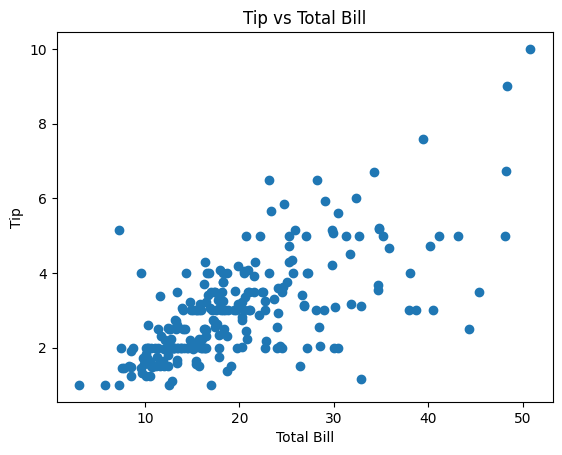

In [58]:
plt.scatter(df['total_bill'],df['tip'])
plt.title('Tip vs Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip')


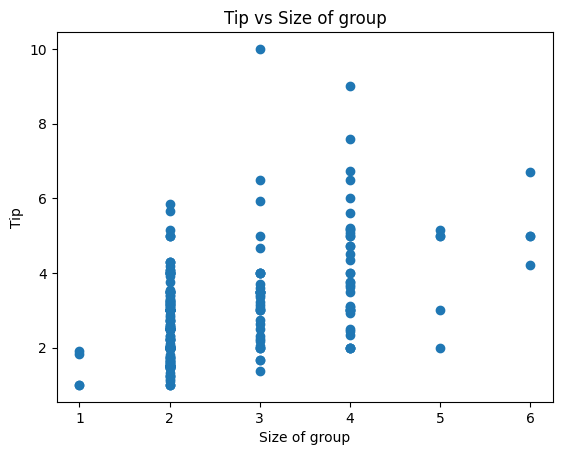

In [59]:
plt.scatter(df['size'],df['tip'])
plt.title('Tip vs Size of group')
plt.xlabel('Size of group')
plt.ylabel('Tip')

plt.show()

we can see that in the range (2,4) high tips are given . Group size 4 are giving more tips and single people are giving less

In [65]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

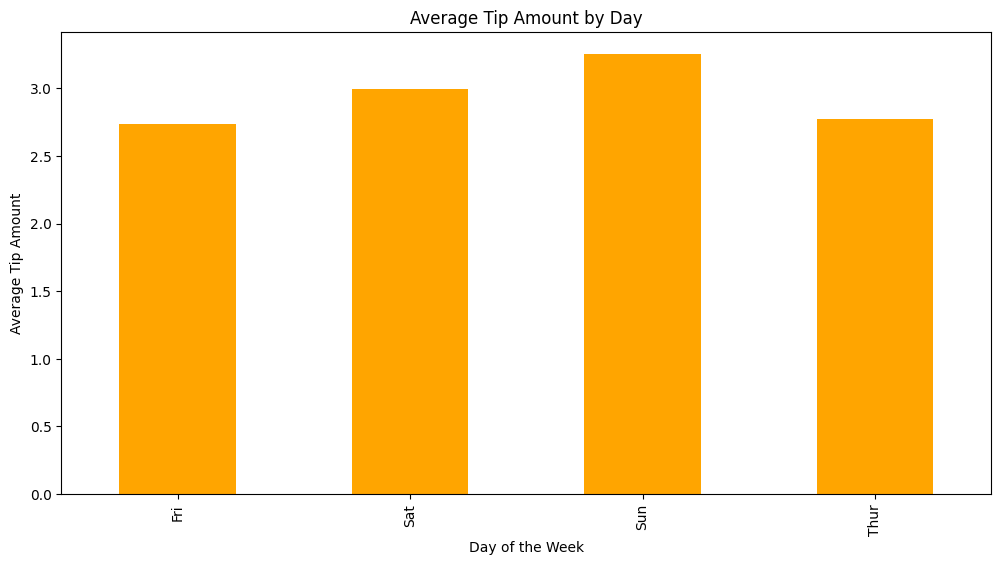

In [66]:

avg_tip_per_day = df.groupby('day')['tip'].mean().sort_index()
# Bar plot for average tip amount per day
plt.figure(figsize=(12, 6))
avg_tip_per_day.plot(kind='bar', color='orange')
plt.title('Average Tip Amount by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Average Tip Amount')
plt.show()

Generally tips are given more during weekends

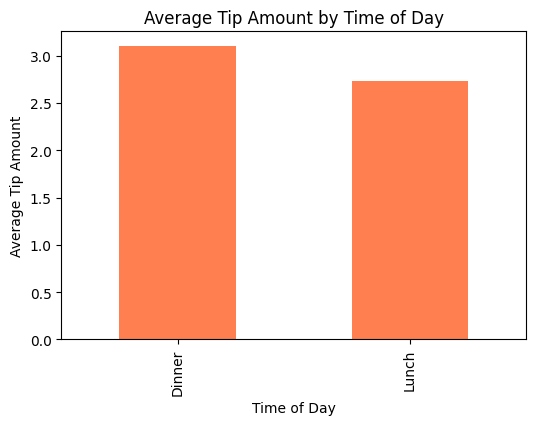

In [67]:
avg_tip_by_time = df.groupby('time')['tip'].mean()
# Bar plot for average tip amount by time of day
plt.figure(figsize=(6, 4))
avg_tip_by_time.plot(kind='bar', color='coral')
plt.title('Average Tip Amount by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Tip Amount')
plt.show()

In general people are giving more tips during dinner time 

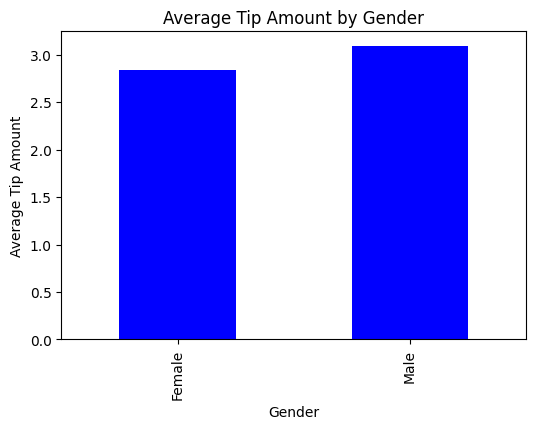

In [68]:
avg_tip_by_gender = df.groupby('sex')['tip'].mean()
# Bar plot for average tip amount by gender
plt.figure(figsize=(6, 4))
avg_tip_by_gender.plot(kind='bar', color='blue')
plt.title('Average Tip Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Tip Amount')
plt.show()

Male give more tips than female 